__Idenficador:__ TPC8  
__Título do Trabalho:__ Trabalhar com Interfaces Gráficas    
__Data de ínicio:__ 2021-11-29   
__Data do Fim:__ 2021-12-05   
__Supervisor:__ José Carlos Ramalho  
__Autor:__ Luís Manuel Mendonça Gonçalves A95637  


__Resumo:__   
Neste trabalho foi pedido que fosse desenvolvido as capacidades de trabalhar com Interfaces Gráficas.
Através do programa criado na aula Teorico Prática número 8 e através do módulo _PySimpleGUI_ foi criado este, fazendo com que o criado anteriormente seja mais apelativo visualmente e mais facil de ser usado.

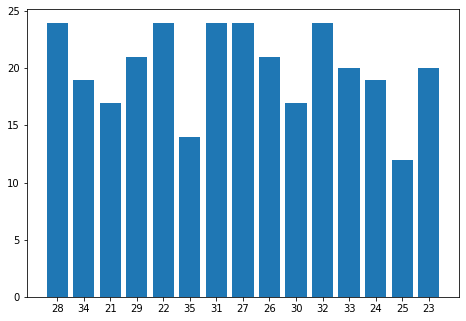

TypeError: 'NoneType' object is not subscriptable

In [1]:
import TP8 as main
import PySimpleGUI as sg
import matplotlib.pyplot as plt
menu_list_column = [
    [sg.Button("Carregar BD")],
    [sg.Button("Ler BD")],
    [sg.Button("Procurar ID")],
    [sg.Button("Modalidades")],
    [sg.Button("Distribuição da BD")],
    [sg.Button("Sair")]
]

data_viewer_column = [
    [sg.Text("Painel de Dados")],
    [sg.Text(size=(120, 1), key="-Dados-")],
]

layout = [
    [
        sg.Column(menu_list_column),
        sg.VSeperator(),
        sg.Column(data_viewer_column),
    ]
]

window = sg.Window("Sample App", layout)

stop = False
while not stop:
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
    # Folder name was filled in, make a list of files in the folder
    elif event == "Carregar BD":  
        window["-Dados-"].update("Vou carregar a BD...")
        formLayout = [[sg.Text('Introduza a nome da BD')],
          [sg.Text('nome', size=(10, 1)), sg.InputText(key='loc')],
          [sg.Button('Inserir'), sg.Button('Cancelar')]]
        
        wform = sg.Window('Inserção de um registo', formLayout)
        inputEvent, inputValues = wform.read(close=True)
        wform.close()
        a=inputValues["loc"]
        try:
            window["-Dados-"].update("A abrir "+ a )
        except FileNotFoundError:
            window["-Dados-"].update("Erro: evento desconhecido :: " + inputEvent)
    elif event =="Ler BD":
        window["-Dados-"].update("Vou ler a BD...")
        sg.Print(main.listarDataset(main.lerDataset(a)))
    elif event =="Procurar ID":
        formLayout = [[sg.Text('Introduza o ID que procura')],
          [sg.Text('ID', size=(10, 1)), sg.InputText(key='id')],
          [sg.Button('Inserir'), sg.Button('Cancelar')]]
        wform = sg.Window('Inserção de um registo', formLayout)
        inputEvent, inputValues = wform.read(close=True)
        wform.close()
        i=str(main.consultarDataset(main.lerDataset(a),inputValues["id"]))
        
        if i =="false":
            window["-Dados-"].update(str("O " +inputValues["id"]+" não é Federado"))
        elif i=="Erro":
            window["-Dados-"].update("Erro: Não existe esse Id") 
        else:
            window["-Dados-"].update(str("O "+inputValues["id"]+" é Federado"))
    elif event =="Modalidades":
        mod=main.modalidades(main.lerDataset(a))
        window["-Dados-"].update(mod)
    elif event =="Distribuição da BD":
        formLayout1 = [[sg.Text('Escolha a Base da distribuição')],
          [sg.Button("Idade")], [sg.Button("Género")],
          [sg.Button("Modalidade")], [sg.Button("Clube")],
          [sg.Button("Federado")], [sg.Button("Resultado")],
          [sg.Button('Cancelar')]]
        window2 = sg.Window("Escolha Distri", formLayout1)
        Acabar=False
        while not Acabar:
            event2, values = window2.read()
            if event == "Cancelar" or event == sg.WIN_CLOSED:
                Acabar = True
            
            if event2!="Cancelar":
                Layout=[[sg.Text("Gráfico")],
                [sg.Text(size=(120, 1), key="Grafi")]]
                window3 = sg.Window("Graf", Layout, finalize=True)
                window.finalize()
                window3["Grafi"].update(main.plotDistrib(main.lerDataset(a),event2))
                

        window2.close()
    else:
        window["-Dados-"].update("Erro: evento desconhecido :: " + inputEvent)

window.close()